<a href="https://colab.research.google.com/github/Sampritisahoo/UNIFIED-MENTOR_DATA-SCIENCE/blob/main/Unified_Mentor_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Playstore Apps rating Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/content/googleplaystore.csv")

In [3]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3094,WatchESPN,SPORTS,4.1,288809,6.6M,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up
4865,AB Repeat Player,VIDEO_PLAYERS,4.3,1628,18M,"100,000+",Free,0,Everyone,Video Players & Editors,"March 6, 2018",4.1.1,4.4 and up
8335,DF Glue Board,PARENTING,5.0,1,27M,10+,Free,0,Everyone,Parenting,"January 19, 2018",Glueboardv.6,4.2 and up
10254,FC Porto,SPORTS,4.9,15883,21M,"100,000+",Free,0,Everyone,Sports,"June 19, 2018",2.6.0,4.0.3 and up
5320,Official AL Fishing & Hunting,TRAVEL_AND_LOCAL,4.2,1291,40M,"50,000+",Free,0,Everyone,Travel & Local,"October 18, 2017",5.29.77 Domain 427,4.4 and up
259,Microsoft Remote Desktop,BUSINESS,4.2,97702,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 11, 2018",Varies with device,Varies with device
10541,FK Bregalnica Štip,SPORTS,NaN,0,26M,1+,Free,0,Everyone,Sports,"February 24, 2018",1.0,4.1 and up
10817,HTC Sense Input - FR,TOOLS,4.0,885,8.0M,"100,000+",Free,0,Everyone,Tools,"October 30, 2015",1.0.612928,5.0 and up
10013,Rescue Robots Survival Games,GAME,4.0,27557,69M,"5,000,000+",Free,0,Teen,Action,"July 6, 2018",F2i,4.1 and up
7133,CB TV,FAMILY,NaN,2,1.9M,100+,Free,0,Teen,Strategy,"September 13, 2016",1.0.0,4.0.3 and up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data['App'].isna().sum()

np.int64(0)

In [7]:
data['Category'].isnull().sum()

np.int64(0)

In [8]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
data['Category'].loc[10472]=np.nan

In [11]:
data['Category'].loc[10472]

nan

In [12]:
df_category=data['Category'].value_counts()
df_category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


<Axes: ylabel='Category'>

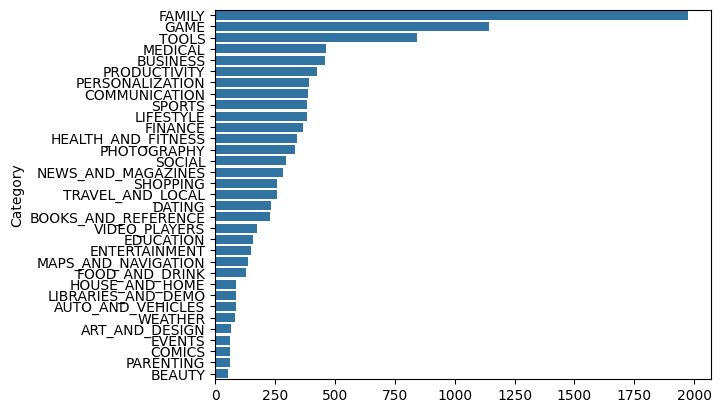

In [13]:
sns.barplot(x=df_category.values,y=df_category.index,orient='h')

In [14]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [17]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
data['Reviews'].dtype

dtype('O')

In [20]:

data['Reviews']=data['Reviews'].replace('3.0M','3000000.0')

In [21]:
data['Reviews']=data['Reviews'].astype(float)

In [22]:
data['Reviews'].dtype

dtype('float64')

In [23]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
data['Size']=data['Size'].str.replace('M','000') # This Converte sizes to Kbytes
data['Size']=data['Size'].replace('Varies with device',np.nan)
data['Size']=data['Size'].str.replace('k','')
data['Size']=data['Size'].replace('1,000+','1000')

In [25]:
data['Size']=data['Size'].astype(float)

In [26]:
data['Size'].dtype

dtype('float64')

In [27]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [31]:
data['Installs'].dtype

dtype('float64')

In [32]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [33]:
data['Price'].dtype

dtype('O')

In [35]:

raiting=data['Content Rating'].value_counts()
raiting

,count
Content Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


In [38]:
px.scatter(x=raiting.index,y=raiting.values,color=raiting.index,title="Apps Raiting")
data.groupby('Category')['Reviews'].sum()

,Reviews
Category,
ART_AND_DESIGN,1.714440e+06
AUTO_AND_VEHICLES,1.163666e+06
BEAUTY,3.962400e+05
BOOKS_AND_REFERENCE,2.195907e+07
BUSINESS,1.395455e+07
COMICS,3.383276e+06
COMMUNICATION,8.154623e+08
DATING,7.291278e+06
EDUCATION,3.959579e+07


In [39]:
data.describe()

,Rating,Reviews,Size,Installs
count,9367.000000,1.084100e+04,9146.000000,1.084000e+04
mean,4.193338,4.443887e+05,19577.388487,1.546434e+07
std,0.537431,2.927728e+06,24041.532453,8.502936e+07
min,1.000000,0.000000e+00,1.000000,0.000000e+00
25%,4.000000,3.800000e+01,5.600000,1.000000e+03
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05
75%,4.500000,5.479800e+04,30000.000000,5.000000e+06
max,19.000000,7.815831e+07,100000.000000,1.000000e+09


In [40]:
category_review=data.groupby('Category')['Reviews'].max().head(10)
category_review

,Reviews
Category,
ART_AND_DESIGN,295237.0
AUTO_AND_VEHICLES,271920.0
BEAUTY,113715.0
BOOKS_AND_REFERENCE,2915189.0
BUSINESS,1279800.0
COMICS,1013944.0
COMMUNICATION,69119316.0
DATING,516917.0
EDUCATION,6290507.0


In [41]:
data['Rating']

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


In [44]:
def category_rating(rating):
  try:
    rating = round(rating)
    if int(rating) in range(0,3):
      return 'low'
    elif int(rating) in range(3,5):
      return 'Average'
    elif int(rating) in range(4,6):
      return 'High'
  except ValueError as error:
      return 'none'

data['category_rating']=data['Rating'].apply(category_rating)
category_r=data['category_rating'].value_counts()

In [45]:
category_r=data['category_rating'].value_counts()

In [47]:
px.bar(x=category_r.values,y=category_r.index,color=category_r.index,title="Category Rating")

In [48]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,category_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Average
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Average
